# Project_Spam_Mails

In [1]:
# import Libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MADHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
mes=pd.read_csv('messages.csv')

# Data Preparation

In [3]:
# Checking unique values 
for column in mes.columns:
    print(f"{column}: Number of unique values {mes[column].nunique()}")
    print('------------------------------------------------------------')

subject: Number of unique values 2613
------------------------------------------------------------
message: Number of unique values 2859
------------------------------------------------------------
label: Number of unique values 2
------------------------------------------------------------


### Observation:
    In Subject  there  are 2613 Unique values
    In Message there are 2859 unique values
    In Label there are 2 values which is Target variable.

In [4]:
mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


### Observation:
    Subject and Message are Object type.
    Label is int type

In [5]:
mes.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [6]:
mes.shape

(2893, 3)

### Observation:
    There total 2893 rows and 3 columns

In [7]:
# Checking columns
mes.columns

Index(['subject', 'message', 'label'], dtype='object')

In [8]:
# Checking for duplicates and removing them
mes.drop_duplicates(inplace= True)

In [9]:
# Showing the New shape
mes.shape

(2876, 3)

### Observation:
    2893 columns were reduced to 2876 after removing duplicates

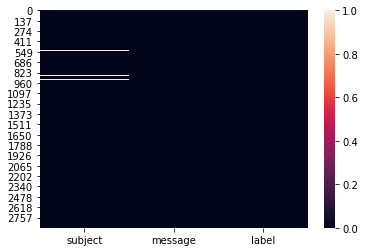

In [10]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mes.isnull())
plt.show()

### Observation:
    There are null values in data

In [40]:
# checking for null values
mes.isnull().sum()

subject    62
message     0
label       0
dtype: int64

### Observation:
    Subject has 62 null values

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
mes['subject']=imp.fit_transform(mes['subject'].values.reshape(-1,1))

### Observation:
    By most_frequent method we have replaced null values

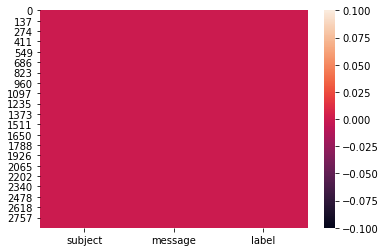

In [22]:
# Again checking for null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mes.isnull())
plt.show()

In [23]:
# Again checking for null values
mes.isnull().sum()

subject    0
message    0
label      0
dtype: int64

### Observation:
    There are no null values

In [43]:
mes.describe()

label
count  2876.000000
mean      0.162726
std       0.369180
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

### Observation:
    There are no Outliers

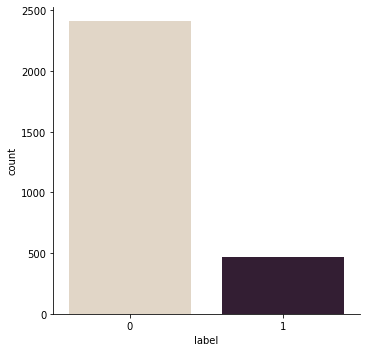

In [14]:
sns.catplot(x="label", kind="count", palette="ch:.25", data=mes)

### Observation:
    Data is biased because 0 are more than 1 

# Building word dictionary

In [24]:
# removing punctuations, Removing stopwords, returning a list of clean text words
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [25]:
# show the tokenization (a list of tokens also called lemmas)
mes['subject'].head().apply(process_text)

0           [job, posting, appleiss, research, center]
1                                   [sociolinguistics]
2    [query, letter, frequencies, text, identificat...
3                                               [risk]
4                         [request, book, information]
Name: subject, dtype: object

In [16]:
mes['message'].head().apply(process_text)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

### Observation:
All punctuation are removed and were seprated by commas

# Feature extraction

In [26]:
# Convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
mes_bow=CountVectorizer(analyzer=process_text).fit_transform(mes['subject'],mes['message'])
print(mes_bow)

  (0, 1691)	1
  (0, 2348)	1
  (0, 424)	1
  (0, 2544)	1
  (0, 663)	1
  (1, 2785)	1
  (2, 2459)	1
  (2, 1821)	1
  (2, 1297)	1
  (2, 2982)	1
  (2, 1533)	1
  (3, 2581)	1
  (4, 2540)	1
  (4, 579)	1
  (4, 1588)	1
  (5, 618)	1
  (5, 274)	1
  (5, 2191)	1
  (5, 2915)	1
  (5, 2999)	1
  (6, 2632)	1
  (6, 1852)	1
  (7, 618)	1
  (7, 1852)	1
  (7, 2230)	1
  :	:
  (2869, 1207)	1
  (2869, 2494)	1
  (2869, 2097)	1
  (2870, 3251)	1
  (2870, 893)	1
  (2870, 147)	1
  (2871, 1893)	1
  (2871, 2402)	1
  (2871, 3311)	1
  (2872, 455)	1
  (2872, 1695)	1
  (2872, 1730)	1
  (2873, 2079)	1
  (2873, 394)	1
  (2873, 779)	1
  (2874, 204)	1
  (2874, 772)	1
  (2874, 2075)	1
  (2874, 449)	1
  (2874, 1992)	1
  (2874, 774)	1
  (2874, 222)	1
  (2875, 1128)	1
  (2875, 374)	1
  (2875, 486)	1


### Observation:
    All features were separated.

In [27]:
mes_bow.shape

(2876, 3320)

### Observation:
    Shape of new Data set mes_bow is 2876 rows and 3320 columns

# Training classifiers and Testing

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(mes_bow,mes['label'],test_size=0.20, random_state = 0)

### Observation:
    From mes_bow we have consider both columns and from mes we have considered Target variable i.e.,label

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Training our models with cross_val_score so that they won't overfit or underfit

In [35]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
       
        score=cross_val_score(m,mes_bow,mes['label'],cv=5)
        print('Score of',m,'is:',score)
        print('Mean score:',score.mean())
        print('Standard deviation:',score.std())
        print('*******************************************************************************************************')
        print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: [0.91319444 0.89565217 0.89043478 0.8973913  0.90956522]
Mean score: 0.9012475845410629
Standard deviation: 0.008660331176530695
*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitte

# Performance evaluation using multiple metrics

In [36]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(mes_bow,mes['label'],test_size=0.20, random_state = 0)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.9608695652173913
Score:
accuracy_score : 0.921875
confusion_matrix : [[493   1]
 [ 44  38]]
classification_report               precision    recall  f1-score   support

           0       0.92      1.00      0.96       494
           1       0.97      0.46      0.63        82

    accuracy                           0.92       576
   macro avg       0.95      0.73      0.79       576
weighted avg       0.93      0.92      0.91       576

*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_d

### Observation:
    1) Score of LogisticRegression       = 96% and accuracy score = 92%
    2) score of DecisionTreeClassifier   = 99% and accuracy score = 65%
    3) score of KNeighborsClassifier     = 78% and accuracy score = 65%         
    4) Score of SVC                      = 96% and accuracy score = 90%
    5) Score of RandomForestClassifier   = 99% and accuracy socre = 85%
    6) Score of AdaBoostClassifier       = 89% and accuracy score = 90%

###### Among all models LogisticRegression best for this model because of its Confusion matrix, f1 score

In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.921875
[[493   1]
 [ 44  38]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       494
           1       0.97      0.46      0.63        82

    accuracy                           0.92       576
   macro avg       0.95      0.73      0.79       576
weighted avg       0.93      0.92      0.91       576



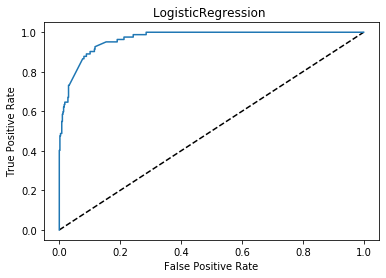

0.7306951713241828


In [38]:
#AUC_ROC curve and finding auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ')
plt.show()

auc_score=roc_auc_score(y_test,pred)
print(auc_score)

### Conclusion:
    Logistic Regression is the best Model Among all models with best accuray Score,precision,recall,f1-score